# Importing Skin Cancer Data

# Importing all the important libraries

In [1]:
# Importing required libraries
# !pip install tensorflow
# !pip install numpy==1.22


import pathlib
import tensorflow as tf
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import layers

import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,Input,Activation,BatchNormalization,MaxPooling2D

import seaborn as sns
import matplotlib.pyplot as plt

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [2]:
data_dir_train = pathlib.Path(r"C:\Users\Admin\Desktop\melonama-assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test = pathlib.Path(r"C:\Users\Admin\Desktop\melonama-assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test")

In [3]:
# Checking how many number of images are present in Train and test data

image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


# Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

# Create a dataset

Define some parameters for the loader:

In [4]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [5]:
## We will create Train data set using image_dataset_from_directory utility
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
## We will create Validation data set using image_dataset_from_directory utility
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size,
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [8]:
class_names0 = os.listdir(data_dir_train)
class_names = sorted(class_names0)
print(class_names)
num_class = len(class_names)
image_files = [[os.path.join(data_dir_train, class_name, x) 
               for x in os.listdir(os.path.join(data_dir_train, class_name))] 
               for class_name in class_names]

image_file_list = []
image_label_list = []
for i, class_name in enumerate(class_names):
    image_file_list.extend(image_files[i])
    image_label_list.extend([i] * len(image_files[i]))
num_total = len(image_label_list)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# Visualize the data

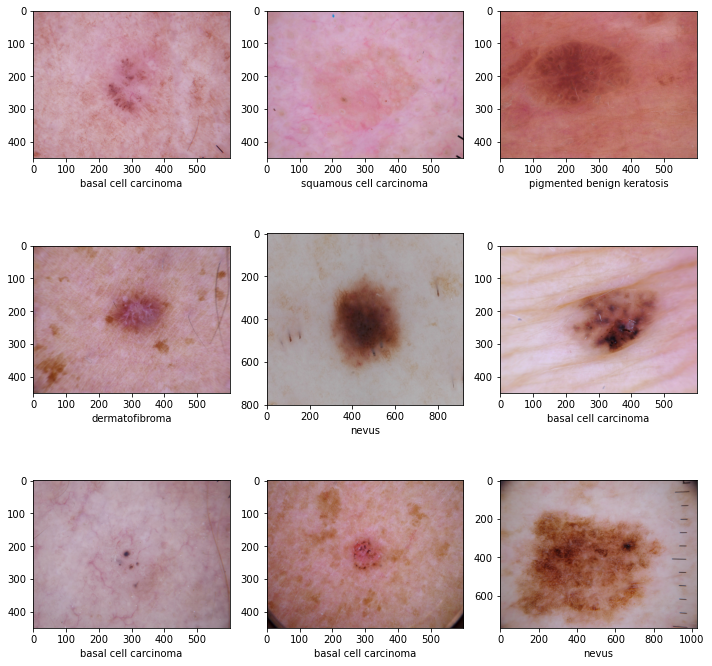

In [9]:
# lets inspect some of the images by visualizing

plt.subplots(3,3, figsize=(10,10))
for i,k in enumerate(np.random.randint(num_total, size=9)):
    im = PIL.Image.open(image_file_list[k])
    arr = np.array(im)
    #print(arr.shape)
    plt.subplot(3,3, i+1)
    plt.xlabel(class_names[image_label_list[k]])
    plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.tight_layout()
plt.show()

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Create the model
We are Creating a CNN model, which can accurately detect 9 classes present in the dataset. We Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [11]:
#CNN Model 

#Sequential model with  first Rescaling layer
model = Sequential([
                    layers.Rescaling(1./255,input_shape=(180,180,3))
])

# 1 Conv layer with 1 MaxPool Layer (1st CNN layer)
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# 1 Conv layer with 1 MaxPool Layer (2nd CNN layer)
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# 1 Conv layer with 1 MaxPool Layer (3rd CNN layer)
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# 1 Conv layer with 1 MaxPool Layer (3rd CNN layer)
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))




#Dropout layer 
model.add(layers.Dropout(0.5))

#Flatten Layer 
model.add(layers.Flatten())

# Fully Connected Dense Layer 
model.add(layers.Dense(128,activation='relu'))

#Dropout layer 
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
model.add(layers.Dense(9, activation='softmax'))

# Compile the model

We are Choosing an appropirate optimiser and loss function for model training

In [12]:
### Lets choose an appropirate optimiser and loss function
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# Viewing the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

# Train the model

In [14]:
# lets fit the model so the training starts

history = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20


F:\anaconda3\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 44s 697ms/step - loss: 2.0414 - accuracy: 0.2349 - val_loss: 1.9635 - val_accuracy: 0.2796
Epoch 2/20
56/56 [==============================] - 40s 713ms/step - loss: 1.9014 - accuracy: 0.2969 - val_loss: 1.8171 - val_accuracy: 0.3289
Epoch 3/20
56/56 [==============================] - 49s 882ms/step - loss: 1.8174 - accuracy: 0.3337 - val_loss: 1.7290 - val_accuracy: 0.3937
Epoch 4/20
56/56 [==============================] - 52s 931ms/step - loss: 1.6907 - accuracy: 0.3884 - val_loss: 1.5679 - val_accuracy: 0.4295
Epoch 5/20
56/56 [==============================] - 54s 969ms/step - loss: 1.6573 - accuracy: 0.4074 - val_loss: 1.5221 - val_accuracy: 0.4318
Epoch 6/20
56/56 [==============================] - 52s 922ms/step - loss: 1.5494 - accuracy: 0.4392 - val_loss: 1.4930 - val_accuracy: 0.4810
Epoch 7/20
56/56 [==============================] - 50s 893ms/step - loss: 1.5125 - accuracy: 0.4637 - val_loss: 1.4457 - val_accuracy: 0.5034
Epoch 8/20

# Visualizing training results

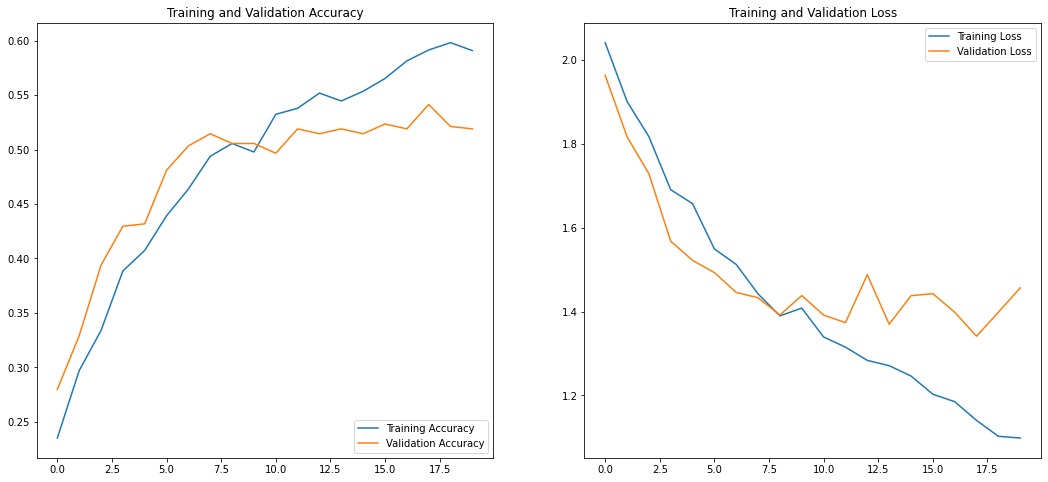

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 20
epochs_range = range(epochs)

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# As we can see from the graph, there is a clear indication of model overfitting as the training accuracy is very high compared to validation accuracy and the difference between them is too high which denotes overfitting.

# Now, we will try to run the same model we have built before including a BatchNormalization layer. As we know, Batch Normalization layer helps avoid overfitting of the model.

# Create the model, compile and train the model

In [16]:
model = keras.Sequential([
                          layers.Rescaling(1./255,input_shape=(180,180,3)),
    layers.RandomFlip(mode="horizontal_and_vertical"),
                             layers.RandomRotation(0.2),
                             layers.RandomZoom(height_factor=(0.3), width_factor=(0.3))
])

In [17]:
#CNN Model 

#Sequential model with  first Rescaling layer
model = Sequential([
                    layers.Rescaling(1./255,input_shape=(180,180,3))
])

# 1 Conv layer with 1 MaxPool Layer (1st CNN layer)
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))


# 1 Conv layer with 1 MaxPool Layer (2nd CNN layer)
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))


# 1 Conv layer with 1 MaxPool Layer (3rd CNN layer)
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))


# # 1 Conv layer with 1 MaxPool Layer (3rd CNN layer)
# model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
# model.add(layers.MaxPool2D(pool_size=(2,2)))


#Dropout layer 
model.add(layers.Dropout(0.5))

#Flatten Layer 
model.add(layers.Flatten())

# Fully Connected Dense Layer 
model.add(layers.Dense(256,activation='relu'))
model.add(layers.BatchNormalization())

#Dropout layer 
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
model.add(layers.Dense(9, activation='softmax'))

# Compiling the mode

In [18]:
### Lets choose an appropirate optimiser and loss function
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training the model

In [19]:
# Train the model

history = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
56/56 [==============================] - 42s 734ms/step - loss: 1.9458 - accuracy: 0.3382 - val_loss: 2.5237 - val_accuracy: 0.2685
Epoch 2/20
56/56 [==============================] - 41s 730ms/step - loss: 1.6256 - accuracy: 0.4498 - val_loss: 1.8666 - val_accuracy: 0.3803
Epoch 3/20
56/56 [==============================] - 41s 730ms/step - loss: 1.4577 - accuracy: 0.5000 - val_loss: 1.6244 - val_accuracy: 0.4810
Epoch 4/20
56/56 [==============================] - 41s 729ms/step - loss: 1.3843 - accuracy: 0.5234 - val_loss: 1.7665 - val_accuracy: 0.4295
Epoch 5/20
56/56 [==============================] - 41s 728ms/step - loss: 1.3138 - accuracy: 0.5402 - val_loss: 1.5836 - val_accuracy: 0.4474
Epoch 6/20
56/56 [==============================] - 41s 740ms/step - loss: 1.2608 - accuracy: 0.5631 - val_loss: 2.3244 - val_accuracy: 0.3714
Epoch 7/20
56/56 [==============================] - 41s 728ms/step - loss: 1.2215 - accuracy: 0.5597 - val_loss: 1.4340 - val_accuracy: 0.5145

# Visualizing the results

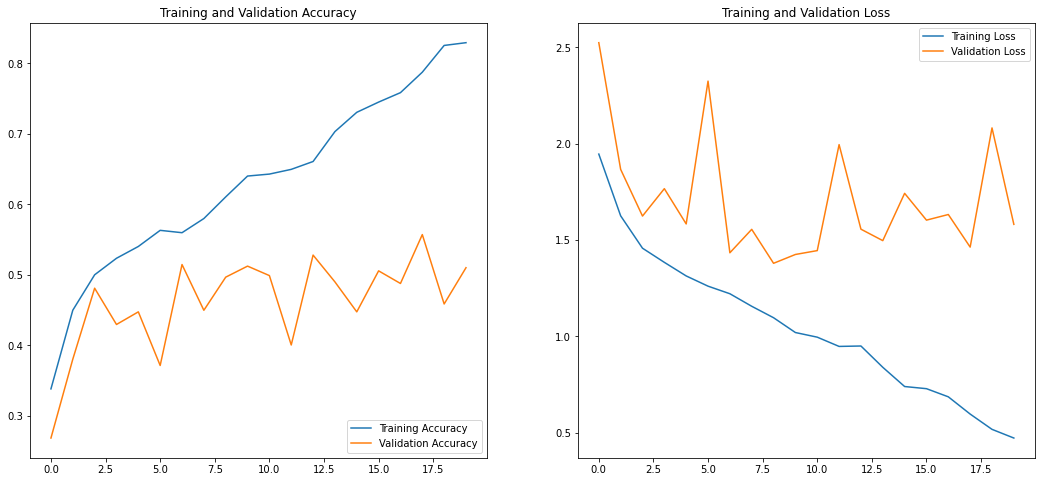

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# As we saw, the accuracy of the train data has come down significantly, this shows that the batch normalization has helped and we can see near similar accuracy for both train and validation data.

# Lets find the distribution of classes in the training dataset.

# Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [21]:
# we are writting a function to check Class Imbalance
dict_class = dict()
for i in class_names:
    count = 0
    for j in data_dir_train.glob(i+'/*.jpg'):
        count += 1
    dict_class[i]= count
dict_class

{'actinic keratosis': 114,
 'basal cell carcinoma': 376,
 'dermatofibroma': 95,
 'melanoma': 438,
 'nevus': 357,
 'pigmented benign keratosis': 462,
 'seborrheic keratosis': 77,
 'squamous cell carcinoma': 181,
 'vascular lesion': 139}

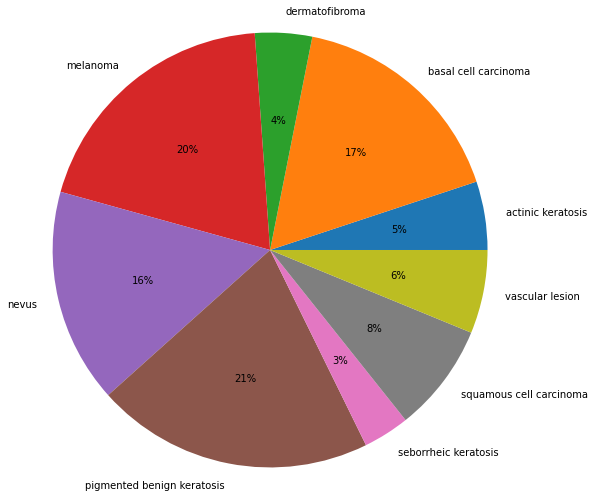

<Figure size 720x720 with 0 Axes>

In [22]:
plt.pie(dict_class.values(), labels=dict_class.keys(),  autopct='%.0f%%',radius=2.5)
plt.figure(figsize=(10,10))

plt.show()

# : Lets see some info about the class
# - Which class has the least number of samples?
#------ Ans : 'seborrheic keratosis' has the least number of samples with 77 samples in training data
#- Which classes dominate the data in terms proportionate number of samples?
------ Ans : 'pigmented benign keratosis' has the Most number of samples with # 462 samples in training data
# Lets rectify the class imbalance
# Context: You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [23]:
# Install Augmentor. Run this only once

!pip install Augmentor

In [24]:
# Pipeline to use Augmentor and create images in train dataset to resolve class imbalance

path_to_training_dataset= "C:\\Users\\Admin\\Desktop\\melonama-assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)  #Adding 500 samples per class to make sure that none of the classes are sparse

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x150197F2DF0>:   3%| | 13/500 [00:00<00:50,  9.71 Samples/s

Initialised with 114 image(s) found.
Output directory set to C:\Users\Admin\Desktop\melonama-assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x150198868E0>: 100%|█| 500/500 [00:02<00:
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x150198EF340>:   1%| | 7/500 [00:00<01:01

Initialised with 376 image(s) found.
Output directory set to C:\Users\Admin\Desktop\melonama-assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x15019D93460>: 100%|█| 500/500 [00:03<00:00, 153.92 Samples
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x150197B9C40>:   2%| | 8/500 [00:00<00:55,  8.85 Samples/s]

Initialised with 95 image(s) found.
Output directory set to C:\Users\Admin\Desktop\melonama-assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1501988A700>: 100%|█| 500/500 [00:03<00:00, 159.40 Samples
Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x1501C623BB0>:   0%| | 2/500 [00:00<01:30,  5.49 Samples/s]

Initialised with 438 image(s) found.
Output directory set to C:\Users\Admin\Desktop\melonama-assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x15019DA66D0>: 100%|█| 500/500 [00:15<00
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to C:\Users\Admin\Desktop\melonama-assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x150197DF0A0>: 100%|█| 500/500 [00:14<00:00, 34.12 Sample
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x150197DF820>:   0%| | 1/500 [00:00<01:20,  6.21 Samples/s]

Initialised with 462 image(s) found.
Output directory set to C:\Users\Admin\Desktop\melonama-assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x150197EC310>: 100%|█| 500/500 [00:03<00:
Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x15019877430>:   1%| | 3/500 [00:00<01:03,  7.87 Samples/s

Initialised with 77 image(s) found.
Output directory set to C:\Users\Admin\Desktop\melonama-assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x150197DF640>: 100%|█| 500/500 [00:06<00
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x150197BA790>:   1%| | 4/500 [00:00<00:58,  8.55 Samples/s]

Initialised with 181 image(s) found.
Output directory set to C:\Users\Admin\Desktop\melonama-assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x150198CB400>: 100%|█| 500/500 [00:02<00:
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x15019D9AD30>:   2%| | 10/500 [00:00<01:07,  7.30 Samples/s

Initialised with 139 image(s) found.
Output directory set to C:\Users\Admin\Desktop\melonama-assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x150197B80D0>: 100%|█| 500/500 [00:03<00:


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [25]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


# Train the model on the data created using Augmentor

In [26]:
# We create train and validation data set again after augmentation so we can build a new model

batch_size = 32
img_height = 180
img_width = 180

# Create a training dataset

In [27]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=32,
                                                               image_size=(180,180), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


# Create a Validation dataset

In [28]:
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,
                                                            image_size=(180,180), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


# Create your model (make sure to include normalization)

In [29]:
#CNN Model 

#Sequential model with  first Rescaling layer
model = Sequential([
                    layers.Rescaling(1./255,input_shape=(180,180,3))
])

# 1 Conv layer with 1 MaxPool Layer (1st CNN layer)
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# 1 Conv layer with 1 MaxPool Layer (2nd CNN layer)
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# 1 Conv layer with 1 MaxPool Layer (3rd CNN layer)
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer 
model.add(layers.Dropout(0.5))

#Flatten Layer 
model.add(layers.Flatten())

# Fully Connected Dense Layer 
model.add(layers.Dense(128,activation='relu'))

#Dropout layer 
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
model.add(layers.Dense(9, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 41, 41, 128)      

# Compile your model (Choose optimizer and loss function appropriately)

In [31]:
# Compile the model

model.compile(optimizer='Adam', loss="categorical_crossentropy", metrics=['accuracy'])

# Train your model

In [32]:
# Fit the model

history = model.fit(train_ds, validation_data=val_ds, epochs=30
)

Epoch 1/30
169/169 [==============================] - 141s 825ms/step - loss: 1.8793 - accuracy: 0.2928 - val_loss: 1.5688 - val_accuracy: 0.3890
Epoch 2/30
169/169 [==============================] - 141s 834ms/step - loss: 1.4765 - accuracy: 0.4470 - val_loss: 1.4019 - val_accuracy: 0.4692
Epoch 3/30
169/169 [==============================] - 136s 806ms/step - loss: 1.3739 - accuracy: 0.4783 - val_loss: 1.2446 - val_accuracy: 0.5412
Epoch 4/30
169/169 [==============================] - 142s 841ms/step - loss: 1.1862 - accuracy: 0.5584 - val_loss: 1.1148 - val_accuracy: 0.5724
Epoch 5/30
169/169 [==============================] - 129s 764ms/step - loss: 1.0835 - accuracy: 0.5916 - val_loss: 1.0792 - val_accuracy: 0.5969
Epoch 6/30
169/169 [==============================] - 136s 801ms/step - loss: 0.9340 - accuracy: 0.6536 - val_loss: 0.9184 - val_accuracy: 0.6800
Epoch 7/30
169/169 [==============================] - 140s 824ms/step - loss: 0.8119 - accuracy: 0.7049 - val_loss: 0.8519 -

# Visualize the model results

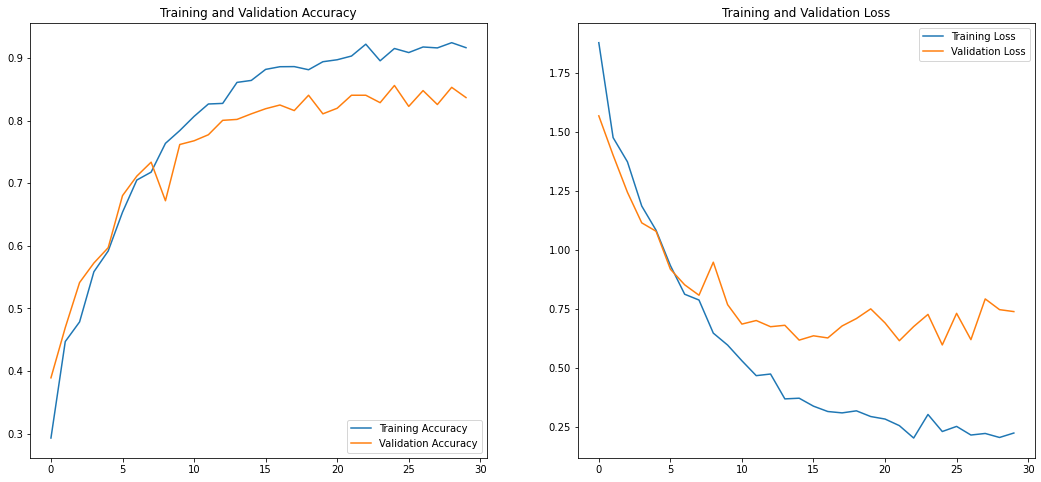

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Lets Analyze our results here. Did we get rid of underfitting/overfitting? Did class rebalance help?
Ans-- Yes, our analysis indicates that we've effectively addressed both underfitting and overfitting. By comparing the training accuracy of [0.9164] to the validation accuracy of [0.8367], we observe a close alignment, suggesting that overfitting and underfitting have been mitigated. Moreover, when contrasting the model's performance before and after class rebalancing, it's evident that rebalancing the classes has positively impacted the results. Therefore, we can confidently affirm that class rebalancing has indeed contributed to the improvement.